# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from citipy import citipy
from scipy import stats
#define API key
import configparser
config = configparser.ConfigParser()
initfile = "..\\config\\auth.ini"
config.read(initfile)
weather_api_key = config.get('OpenWeatherMap','weather_api_key')

## Generate Cities List

In [2]:
longitudes = np.arange(-180,360,10)
latitudes = np.arange(-90,180,5)

cities = []
countries = []

for longitue in longitudes:
    for latitude in latitudes:
        city = (citipy.nearest_city(latitude, longitue)).city_name
        country = (citipy.nearest_city(latitude, longitue)).country_code
        if city not in cities:
            cities.append(city)
            countries.append(country.upper())
            
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
temp = []
lat = []
lon = []
Humidity = []
Cloudiness = []
wind = []
date = []
i=0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        if response['cod'] == 200:
            print(f"City number {i}: {city} , Processed")
            try:
                temp.append(response['main']['temp_max'])
            except KeyError:
                temp.append('NAN')
            
            try:
                lat.append(response['coord']['lat'])
            except KeyError:
                lat.append('NAN')
            
            try:
                lon.append(response['coord']['lon'])
            except KeyError:
                lon.append('NAN')    
            
            try:   
                Humidity.append(response['main']['humidity'])
            except KeyError:
                Humidity.append('NAN')
            
            try:
                Cloudiness.append(response['clouds']['all'])
            except KeyError:
                Cloudiness.append('NAN')
            
            try:    
                wind.append(response['wind']['speed'])
            except KeyError:
                wind.append('NAN')
         
            try:    
                date.append(response['dt'])
            except KeyError:
                date.append('NAN')        
        elif response['cod'] == '404':
            print(f"City number {i}: {city} , not available")
            temp.append('NAN')
            lat.append('NAN')
            lon.append('NAN')
            Humidity.append('NAN')
            Cloudiness.append('NAN')
            wind.append('NAN')
            date.append('NAN')
        i+=1
    except IndexError:
        print("index error")
        i+=1
    

City number 0: vaini , Processed
City number 1: halalo , not available
City number 2: vaitupu , not available
City number 3: kapaa , Processed
City number 4: provideniya , Processed
City number 5: egvekinot , Processed
City number 6: mys shmidta , not available
City number 7: alofi , Processed
City number 8: satitoa , not available
City number 9: samalaeulu , not available
City number 10: saleaula , not available
City number 11: bethel , Processed
City number 12: lavrentiya , Processed
City number 13: barrow , Processed
City number 14: mataura , Processed
City number 15: avarua , Processed
City number 16: faanui , Processed
City number 17: samusu , not available
City number 18: hilo , Processed
City number 19: ewa beach , Processed
City number 20: kodiak , Processed
City number 21: teahupoo , Processed
City number 22: fare , Processed
City number 23: atuona , Processed
City number 24: kahului , Processed
City number 25: sterling , Processed
City number 26: college , Processed
City numb

City number 211: vila franca do campo , Processed
City number 212: dingle , Processed
City number 213: vestmannaeyjar , Processed
City number 214: blonduos , not available
City number 215: barentsburg , not available
City number 216: hermanus , Processed
City number 217: cape town , Processed
City number 218: harper , Processed
City number 219: buchanan , Processed
City number 220: tokonou , Processed
City number 221: nioro , Processed
City number 222: atar , Processed
City number 223: tiznit , Processed
City number 224: azimur , not available
City number 225: peniche , Processed
City number 226: carballo , Processed
City number 227: skibbereen , Processed
City number 228: ballina , Processed
City number 229: sorvag , not available
City number 230: hofn , Processed
City number 231: husavik , Processed
City number 232: saldanha , Processed
City number 233: luderitz , Processed
City number 234: port-gentil , Processed
City number 235: takoradi , Processed
City number 236: accra , Process

City number 425: banda aceh , Processed
City number 426: port blair , Processed
City number 427: mathbaria , Processed
City number 428: sherpur , Processed
City number 429: lasa , Processed
City number 430: korla , Processed
City number 431: urumqi , Processed
City number 432: mugur-aksy , Processed
City number 433: kopyevo , not available
City number 434: teya , Processed
City number 435: turukhansk , Processed
City number 436: talnakh , Processed
City number 437: palabuhanratu , not available
City number 438: payakumbuh , Processed
City number 439: ayer itam , not available
City number 440: ko samui , Processed
City number 441: doembang nangbuat , Processed
City number 442: chiang rai , Processed
City number 443: dali , Processed
City number 444: yaan , Processed
City number 445: xining , Processed
City number 446: zhangye , Processed
City number 447: hovd , Processed
City number 448: moron , Processed
City number 449: atagay , Processed
City number 450: kodinsk , Processed
City numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
RawData_df = pd.DataFrame({"City":cities,
                           "Country":countries,
                           "Latitude":lat,
                           "Longitude":lon,
                           "Max Temperature (F)":temp,
                           "Humidity (%)":Humidity,
                           "Cloudiness (%)":Cloudiness,
                           "Wind Speed (mph)":wind,
                           "Date":date})
RawData_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,vaini,TO,-21.2,-175.2,84.2,84,75,5.75,1619144226
1,halalo,WF,NAN,NAN,NAN,NAN,NAN,NAN,NAN
2,vaitupu,WF,NAN,NAN,NAN,NAN,NAN,NAN,NAN
3,kapaa,US,22.0752,-159.319,79,65,20,10.36,1619144227
4,provideniya,RU,64.3833,-173.3,41,48,0,11.18,1619144227
...,...,...,...,...,...,...,...,...,...
594,russell,NZ,32.3502,-85.1999,55.4,71,1,2.35,1619144309
595,asau,TV,46.4333,26.4,42.01,60,83,2.3,1619144309
596,rungata,KI,NAN,NAN,NAN,NAN,NAN,NAN,NAN
597,beringovskiy,RU,63.05,179.3167,29.05,71,99,8.25,1619144309


In [6]:
cleaned_df = RawData_df[RawData_df['Latitude']!="NAN"]
cleaned_df.to_csv("../output_data/cities.csv")
cleaned_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,vaini,TO,-21.2,-175.2,84.2,84,75,5.75,1619144226
3,kapaa,US,22.0752,-159.319,79,65,20,10.36,1619144227
4,provideniya,RU,64.3833,-173.3,41,48,0,11.18,1619144227
5,egvekinot,RU,66.3167,-179.1667,30.16,81,21,1.21,1619144227
7,alofi,NU,-19.0595,-169.9187,84.2,74,40,11.5,1619144228
...,...,...,...,...,...,...,...,...,...
593,ngunguru,NZ,-35.6167,174.5,66.78,74,100,10.54,1619144309
594,russell,NZ,32.3502,-85.1999,55.4,71,1,2.35,1619144309
595,asau,TV,46.4333,26.4,42.01,60,83,2.3,1619144309
597,beringovskiy,RU,63.05,179.3167,29.05,71,99,8.25,1619144309


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Index_label = cleaned_df[cleaned_df['Humidity (%)'] > 100].index.tolist()
Index_label

[]

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

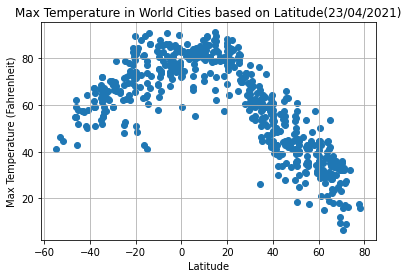

In [10]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Max Temperature (F)'], marker="o")

# Incorporate the other graph properties
plt.title('Max Temperature in World Cities based on Latitude(23/04/2021)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/TemperatureInWorldCities.png')
plt.show()

As shown in the plot, obviously Cities closer to Latitude 0(equator) are warmer than the rest. More cold cities in Northern Hemisphere observed. 

## Latitude vs. Humidity Plot

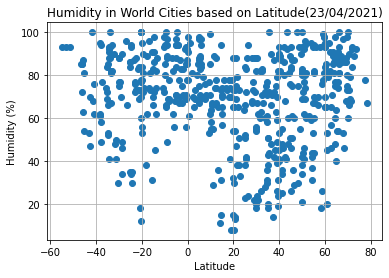

In [11]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Humidity (%)'], marker="o")

# Incorporate the other graph properties
plt.title('Humidity in World Cities based on Latitude(23/04/2021)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/HumidityInWorldCities.png')
plt.show()

No obvious relationship found between humidity and latitude of the cities.the Humidity of cities located around equator are higher than 50%. The cities with humidity of 100% are mostly located in arround equator and Northen Hemisphere.

## Latitude vs. Cloudiness Plot

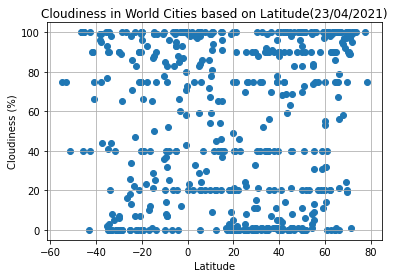

In [12]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Cloudiness (%)'], marker="o")

# Incorporate the other graph properties
plt.title('Cloudiness in World Cities based on Latitude(23/04/2021)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/CloudinessInWorldCities.png')
plt.show()

No obvious relationship found between Cloudiness and latitude of the cities. More cities with 0% cloudiness located in Northern Hemisphere.

## Latitude vs. Wind Speed Plot

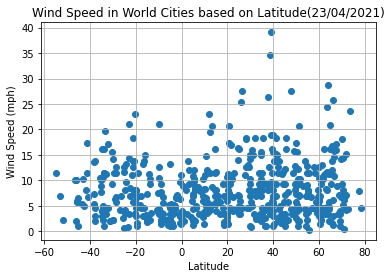

In [13]:
# Build a scatter plot for each data type
plt.scatter(cleaned_df['Latitude'], cleaned_df['Wind Speed (mph)'], marker="o")

# Incorporate the other graph properties
plt.title('Wind Speed in World Cities based on Latitude(23/04/2021)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/WindSpeedInWorldCities.png')
plt.show()

No obvious relationship found between wind speed and latitude of the cities. During the observation, the strongest winds observed close to latitude:+40 but can be changed in time for sure. 

# Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8139259458090878
y = -0.92x + 90.65


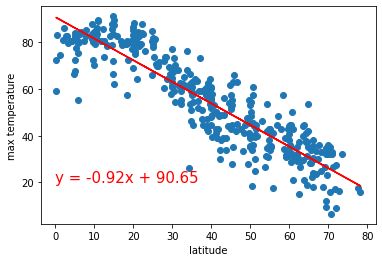

In [15]:
#Northern Hemisphere
# Create a Scatter Plot for temperature vs. latitude 
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Max Temperature (F)']
(nt_slope, nt_intercept, nt_rvalue, nt_pvalue, nt_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nt_slope + nt_intercept
line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('max temperature')
print(f"The r-squared is: {nt_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.472406773557255
y = 0.57x + 81.82


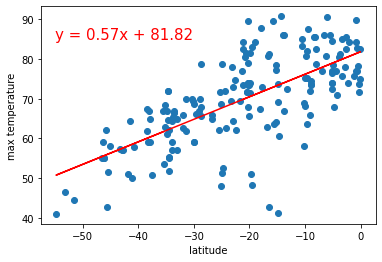

In [18]:
#Southern Hemisphere
# Create a Scatter Plot for temperature vs. latitude 
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Max Temperature (F)']
(st_slope, st_intercept, st_rvalue, st_pvalue, st_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * st_slope + st_intercept
line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('max temperature')
print(f"The r-squared is: {st_rvalue**2}")
print(line_eq)
plt.show()

Observing both Northern & Southern Hemisphere - Max Temp vs. Latitude Linear Regression, Max Temp gets increased by getting closer to equator. This is same result as we expected. The equator receives the most direct sunlight causing warmer temperatures around equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019433516335735347
y = 0.15x + 60.86


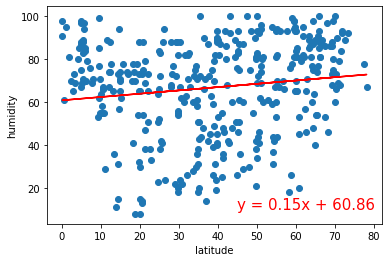

In [19]:
#Northern Hemisphere
# Create a Scatter Plot for humidity vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Humidity (%)']
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nh_slope + nh_intercept
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {nh_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013309629561042924
y = 0.15x + 78.74


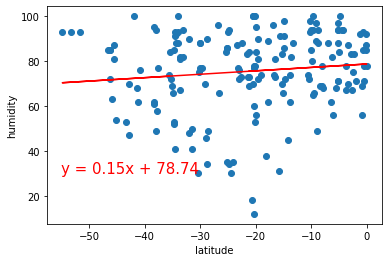

In [20]:
#Southern Hemisphere
# Create a Scatter Plot for humidity vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Humidity (%)']
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sh_slope + sh_intercept
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {sh_rvalue**2}")
print(line_eq)
plt.show()

Observing both Northern & Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression, there is an inconsiderable increase in humidity moving from south to north hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02856493869081482
y = 0.33x + 40.5


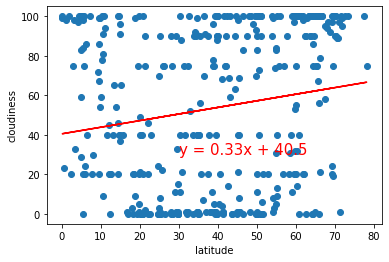

In [21]:
#Northern Hemisphere
# Create a Scatter Plot for cloudiness vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Cloudiness (%)']
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nc_slope + nc_intercept
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {nc_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009530318177044342
y = 0.09x + 57.85


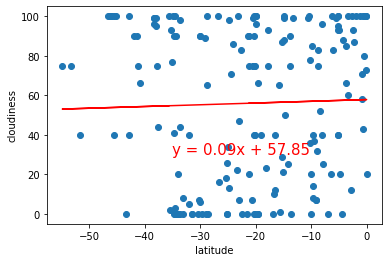

In [22]:
#Southern Hemisphere
# Create a Scatter Plot for cloudiness vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Cloudiness (%)']
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sc_slope + sc_intercept
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {sc_rvalue**2}")
print(line_eq)
plt.show()

Observing both Northern & Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression, there is an insignificant increase in cloudiness moving from south to north hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0029287974090705213
y = 0.02x + 7.8


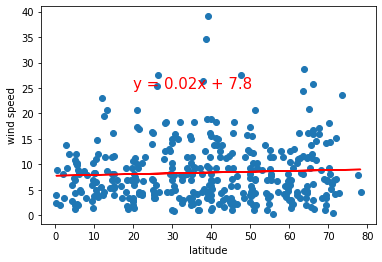

In [23]:
#Northern Hemisphere
# Create a Scatter Plot for wind speed vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']>=0,'Wind Speed (mph)']
(nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * nw_slope + nw_intercept
line_eq= "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {nw_rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06162636181177468
y = -0.09x + 4.98


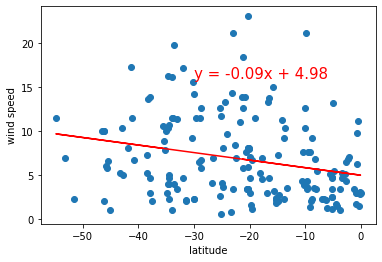

In [24]:
#Southern Hemisphere
# Create a Scatter Plot for wind speed vs. latitude
x_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Latitude']
y_values = cleaned_df.loc[cleaned_df['Latitude']<0,'Wind Speed (mph)']
(sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * sw_slope + sw_intercept
line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,16),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {sw_rvalue**2}")
print(line_eq)
plt.show()

Observing both Northern & Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression, the Wind Speed is a little bit less around equator but it's negligible.